In [49]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

### Равномерное распределение

####  Пример: Время ожидания лифта в здании распределенно равномерно в диапозоне от 0 до 2 минут

C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


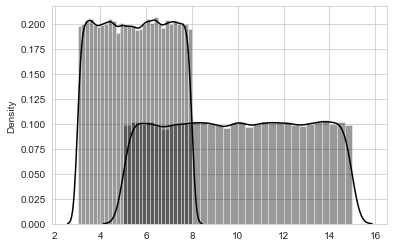

In [4]:
#Равномерное распределение, 2 случайные выборки, но с разными нижними границами(loc) и диапазоном распределения(scale)


from scipy.stats import uniform
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

#taking random variables from Uniform distribution
data = uniform.rvs(size = 100000, loc = 5, scale=10)
data_1 = uniform.rvs(size = 100000, loc =3 , scale = 5)

#Plotting the results
sb.set_style('whitegrid')
sb.distplot(data, bins = 30, color = 'k')
sb.distplot(data_1, bins = 30, color = 'k')
ax.set(xlabel = 'interval')
plt.show()

### Распределение Бернули

#### Пример: Из n домашних кошек каждый год сбегают m. Вероятность того, что выбранная наугад кошка сбежит к концу года подчиняется закону Бернули.

C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

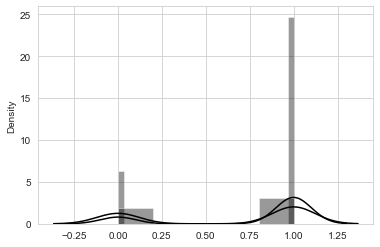

In [18]:
#Распределение Бернули на двух разных случайных выборках с разной вероятностью(p)

import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

#Applying the bernoulli class
data = bernoulli.rvs(size = 1000 , p = 0.8)
data_1 = bernoulli.rvs(size = 1000, p =0.6)

#Visualizing the results
sb.set_style('whitegrid')
sb.distplot(data, color = 'k')
sb.distplot(data_1,color = 'k')


### Распределение Гаусса

#### Вес булочки Синнабон подчиняется закону нормального распределения

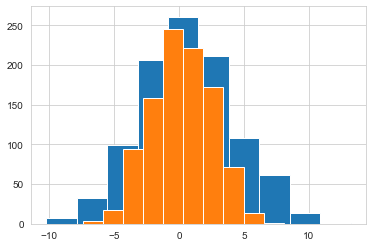

In [29]:
#Распределение Гаусса на двух рандомных выборках 

import matplotlib.pyplot as plt
gaussian = np.random.normal(0.5, 2*np.sqrt(2*np.log(5)), 1000)
gaussian_1 = np.random.normal(0.2, 2*np.sqrt(2*np.log(2)), 1000)

#Визуализируем
plt.hist(gaussian)
plt.hist(gaussian_1)
plt.show()

### Распределение Пуассона 

#### Пример: Каждую неделю в среднем 1000 человек лайкают тикток с котиком.  
#### Какова вероятность того, что точно 1000 человек поставят лайк котику на следующей неделе?

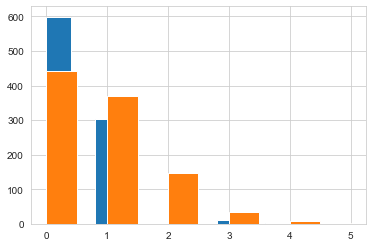

In [31]:
#Распределение Пуассона на двух разный выборках



poisson = np.random.poisson(0.5, 1000)
poisson_1 = np.random.poisson(0.8, 1000)

plt.hist(poisson)
plt.hist(poisson_1)
plt.show()

### Хи-квадрат

#### Распределение дисперсии веса котиков

<AxesSubplot:ylabel='Count'>

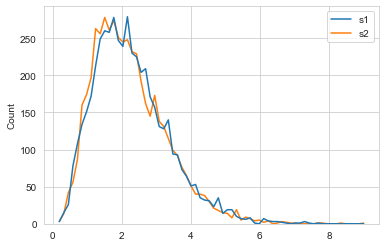

In [97]:
#Генерируем случайные выборкиЬ полученные  из генеральной совокупности с распределением N(5, 1.5^{2})


#создаем датафрейм для дальнейшей реализации х2 - квадрат распределения 


samples = sps.norm.rvs(loc=(5, 3), scale=1.5, size=(5000, 10, 2))
deviations = samples.var(axis=1, ddof=1)
deviations_df = pd.DataFrame(deviations, columns=['s1', 's2'])

sns.histplot(data=deviations_df, element="poly", color='r', fill=False)


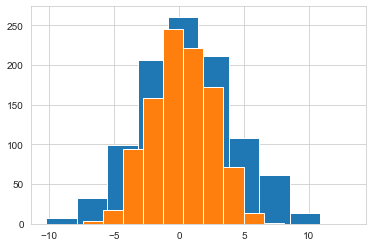

In [98]:
import matplotlib.pyplot as plt
plt.hist(gaussian)
plt.hist(gaussian_1)
plt.show()

In [102]:
#Формируем 2 наши основные случайные выборки с разным количеством степеней свобод 


df1, loc1, scale1 = sps.chi2.fit(deviations_df['s1'], fdf=3)
print(f'df1 = {df1}, loc1 = {loc1:<8.4}, scale1 = {scale1:.3}')

df2, loc2, scale2 = sps.chi2.fit(deviations_df['s2'], fdf=10)
print(f'df2 = {df2}, loc2 = {loc2:<8.4}, scale1 = {scale2:.3}')


df1 = 3, loc1 = 0.1239  , scale1 = 0.717
df2 = 10, loc2 = -0.1108 , scale1 = 0.234


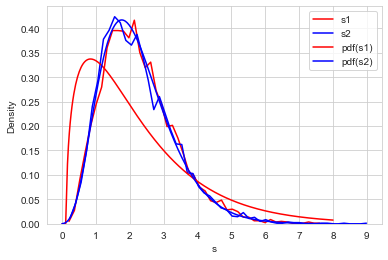

In [103]:
fig, ax = plt.subplots()

# гистограммы придется рисовать по отдельности, иначе
# площадь под каждой из них будет равна 0.5 а не 1:
sns.histplot(data=deviations_df['s1'], color='r', element='poly',
             fill=False, stat='density', label='s1', ax=ax)
sns.histplot(data=deviations_df['s2'], color='b', element='poly',
             fill=False, stat='density', label='s2', ax=ax)


chi2_rv1 = sps.chi2(df1, loc1, scale1)
chi2_rv2 = sps.chi2(df2, loc2, scale2)
x = np.linspace(0, 8, 300)
sns.lineplot(x=x, y=chi2_rv1.pdf(x), color='r', label='pdf(s1)', ax=ax)
sns.lineplot(x=x, y=chi2_rv2.pdf(x), color='b', label='pdf(s2)', ax=ax)
ax.set_xticks(np.arange(10))
ax.set_xlabel('s');

### Log-нормальное распределение


#### Пример: Распределение размера частиц кокаина  согласуется с логарифмическим нормальным законом распределения
#### ( Чем частица больше, тем их в целом меньше)


In [71]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)


In [72]:
mu_1, sigma_1 = 5., 20.

In [73]:
s_1 = np.random.lognormal(mu, sigma, 1000)

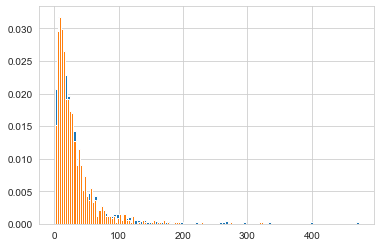

In [74]:

count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
count, bins, ignored = plt.hist(s_1, 100, density=True, align='mid')

In [75]:
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

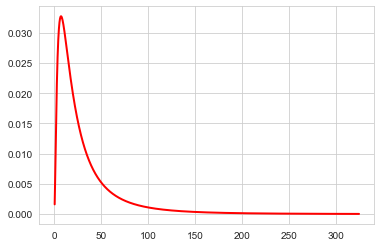

In [76]:
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

### Биноминальное распределение

#### Пример: Вероятность прыгнуть идеальное сальто как Джеки Чан в фильме Пьяный Мастер при n-количестве попыток

In [88]:
# Достаем 2 рандомные выобрки  с разными вводными данными

n, p = 10, .5 
s = np.random.binomial(n, p, 1000)


In [78]:
n_1, p_1 = 20, .9  
s_1 = np.random.binomial(n, p, 1000)


C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


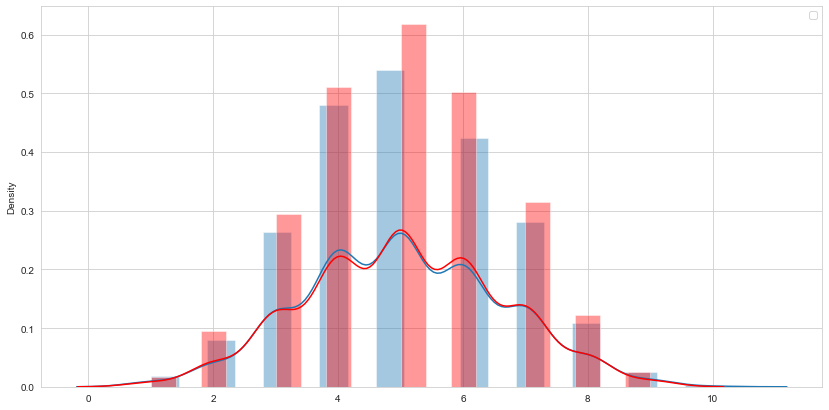

In [114]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(s, bins=20)
ax = sns.distplot(s_1, bins=20,color='red')
plt.legend()

### Распределение Стьюдента

#### Размер булочек Синнабон, которые приготовлю я на своей кухне( это не цех, размер выборки будет меньше, а значит вероятность выбросов - больше)

In [95]:
from scipy import stats
rng = np.random.default_rng()

#Формируем две рандомные выборки
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=10, scale=20, size=500, random_state=rng)


stats.ttest_ind(rvs1, rvs2)

stats.ttest_ind(rvs1, rvs2, equal_var=False)



Ttest_indResult(statistic=-6.340251505831676, pvalue=4.042897514857954e-10)

C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bishenova\.conda\envs\kill_me_please_n\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


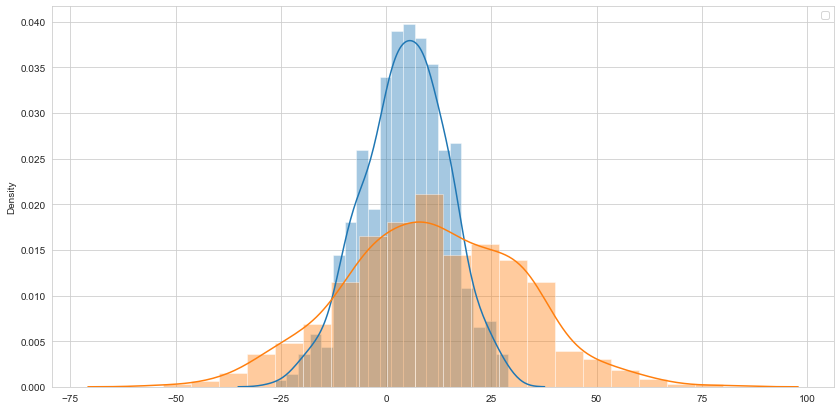

In [112]:
#Визуализируем в виде subplot

fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(rvs1, bins=20)
ax = sns.distplot(rvs2, bins=20)
plt.legend()